In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
import os

In [2]:
unitsTab=pd.read_csv('codes/units.csv')
unitsTab.index = unitsTab['Unit Code']
unitsDict=unitsTab.to_dict()["Units"]

In [3]:
paramsTab=pd.read_csv('codes/parameters.csv')
paramsTab.index = paramsTab['Parameter Code']
paramsDict = paramsTab.to_dict()['Parameter']

In [4]:
def loadData(path):
    df=pd.read_csv(path, parse_dates=[3])
    df.dropna(subset=['datetime'], inplace=True)
    
    df.index = df.datetime
    df.sort_index(inplace=True)

    df['unitCode']=df.unit
    df['parameterCode']=df.parameter

    df.replace({'unit':unitsDict, 'parameter':paramsDict}, inplace=True)
    
    return df

In [5]:
basePath='raw_data/Harrisburg data/'
files=os.listdir(basePath)
file=basePath+files[0]
print(files)

['AQDM_2142402333 (1).txt', 'AQDM_2142473032 (1).txt', 'AQDM_2143508020.txt', 'AQDM_2143639022.txt', 'AQDM_2143621601.txt', 'AQDM_2142175470 (2).txt', 'AQDM_2142473032.txt', 'AQDM_2142175470 (3).txt', 'AQDM_2142175470 (4).txt', 'AQDM_2142091599.txt', 'AQDM_2142175470 (1).txt', 'AQDM_2142402333.txt', 'AQDM_2141990090.txt', 'AQDM_2141990090 (1).txt', 'AQDM_2142175470.txt']


In [6]:
df1=loadData(file)
df1.head(2)

,site,data_status,action_code,datetime,parameter,duration,frequency,value,unit,qc,...,lon,GISDatum,elev,method_code,mpc,mpc_value,uncertainty,qualifiers,unitCode,parameterCode
datetime,,,,,,,,,,,,,,,,,,,,,
2013-01-01 07:00:00,840481410044,1.0,10.0,2013-01-01 07:00:00,PM2.5 - Local Conditions,60.0,0.0,1.0,Micrograms/cubic meter (LC),0.0,...,-106.455227,WGS84,1122.0,170.0,1.0,5.0,NaN,NaN,105.0,88101.0
2013-01-01 08:00:00,840481410044,1.0,10.0,2013-01-01 08:00:00,PM2.5 - Local Conditions,60.0,0.0,2.0,Micrograms/cubic meter (LC),0.0,...,-106.455227,WGS84,1122.0,170.0,1.0,5.0,NaN,NaN,105.0,88101.0


In [7]:
df1.describe()

,data_status,action_code,duration,frequency,value,qc,poc,lat,lon,elev,method_code,mpc,mpc_value,uncertainty,unitCode,parameterCode
count,30242.000000,30242.0,30242.0,30242.0,30242.000000,30242.0,30242.0,3.024200e+04,3.024200e+04,30242.0,30242.0,30242.0,30242.0,0.0,30242.0,30242.0
mean,0.477945,10.0,60.0,0.0,10.017175,0.0,6.0,3.176569e+01,-1.064552e+02,1122.0,170.0,1.0,5.0,NaN,105.0,88101.0
std,0.499522,0.0,0.0,0.0,12.753068,0.0,0.0,7.105545e-15,2.842218e-14,0.0,0.0,0.0,0.0,NaN,0.0,0.0
min,0.000000,10.0,60.0,0.0,-9.100000,0.0,6.0,3.176568e+01,-1.064552e+02,1122.0,170.0,1.0,5.0,NaN,105.0,88101.0
25%,0.000000,10.0,60.0,0.0,4.000000,0.0,6.0,3.176568e+01,-1.064552e+02,1122.0,170.0,1.0,5.0,NaN,105.0,88101.0
50%,0.000000,10.0,60.0,0.0,7.000000,0.0,6.0,3.176568e+01,-1.064552e+02,1122.0,170.0,1.0,5.0,NaN,105.0,88101.0
75%,1.000000,10.0,60.0,0.0,12.000000,0.0,6.0,3.176568e+01,-1.064552e+02,1122.0,170.0,1.0,5.0,NaN,105.0,88101.0
max,1.000000,10.0,60.0,0.0,485.000000,0.0,6.0,3.176568e+01,-1.064552e+02,1122.0,170.0,1.0,5.0,NaN,105.0,88101.0


In [8]:
print(df1.parameter.unique())

['PM2.5 - Local Conditions']


In [9]:
# for f in files:
#     df = loadData(basePath+f)
#     print(f, '\t', df.index.min(), df.index.max(), df.parameter.unique(), df.unit.unique())

In [10]:
filesFrame=pd.DataFrame(files, columns=['filename'])
filesFrame

,filename
0,AQDM_2142402333 (1).txt
1,AQDM_2142473032 (1).txt
2,AQDM_2143508020.txt
3,AQDM_2143639022.txt
4,AQDM_2143621601.txt


In [11]:
filesFrame['table'] = [loadData(basePath+f) for f in filesFrame.filename]

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
filesFrame

,filename,table
0,AQDM_2142402333 (1).txt,site data_status...
1,AQDM_2142473032 (1).txt,site data_status...
2,AQDM_2143508020.txt,site data_status...
3,AQDM_2143639022.txt,"Empty DataFrame Columns: [site, data_status, a..."
4,AQDM_2143621601.txt,"Empty DataFrame Columns: [site, data_status, a..."
5,AQDM_2142175470 (2).txt,site data_status...
6,AQDM_2142473032.txt,site data_status...
7,AQDM_2142175470 (3).txt,site data_status...
8,AQDM_2142175470 (4).txt,site data_status...
9,AQDM_2142091599.txt,site data_status...


In [13]:
allData=pd.concat(list(filesFrame.table))
allData.sort_index(inplace=True)
allData.drop_duplicates(['datetime','value','parameter','unit'], inplace=True)
allData.tail(10)

,site,data_status,action_code,datetime,parameter,duration,frequency,value,unit,qc,...,lon,GISDatum,elev,method_code,mpc,mpc_value,uncertainty,qualifiers,unitCode,parameterCode
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 04:00:00,840420430401,0.0,10.0,2017-01-01 04:00:00,Ozone,60.0,0.0,0.030,Parts per million,0.0,...,-76.846988,WGS84,125.0,87.0,1.0,0.005,NaN,NaN,7.0,44201.0
2017-01-01 04:00:00,840481410044,0.0,10.0,2017-01-01 04:00:00,PM2.5 - Local Conditions,60.0,0.0,3.900,Micrograms/cubic meter (LC),0.0,...,-106.455227,WGS84,1122.0,170.0,1.0,5.000,NaN,NaN,105.0,88101.0
2017-01-01 04:00:00,840481410044,0.0,10.0,2017-01-01 04:00:00,Wind Speed - Scalar,60.0,0.0,5.500,Knots,0.0,...,-106.455227,WGS84,1122.0,50.0,1.0,0.600,NaN,NaN,13.0,61101.0
2017-01-01 05:00:00,840481410044,0.0,10.0,2017-01-01 05:00:00,PM2.5 - Local Conditions,60.0,0.0,18.900,Micrograms/cubic meter (LC),0.0,...,-106.455227,WGS84,1122.0,170.0,1.0,5.000,NaN,NaN,105.0,88101.0
2017-01-01 05:00:00,840481410044,0.0,10.0,2017-01-01 05:00:00,Wind Speed - Scalar,60.0,0.0,6.400,Knots,0.0,...,-106.455227,WGS84,1122.0,50.0,1.0,0.600,NaN,NaN,13.0,61101.0
2017-01-01 05:00:00,840481130069,0.0,10.0,2017-01-01 05:00:00,Carbon monoxide,60.0,0.0,0.229,Parts per million,0.0,...,-96.860117,WGS84,127.0,593.0,1.0,0.020,NaN,NaN,7.0,42101.0
2017-01-01 05:00:00,840482010416,0.0,10.0,2017-01-01 05:00:00,Ozone,60.0,0.0,0.014,Parts per million,0.0,...,-95.294722,WGS84,10.0,47.0,1.0,0.005,NaN,NaN,7.0,44201.0
2017-01-01 05:00:00,840482010416,0.0,10.0,2017-01-01 05:00:00,Outdoor Temperature,60.0,0.0,66.000,Degrees Fahrenheit,0.0,...,-95.294722,WGS84,10.0,40.0,1.0,-60.000,NaN,NaN,15.0,62101.0
2017-01-01 06:00:00,840481410044,0.0,10.0,2017-01-01 06:00:00,PM2.5 - Local Conditions,60.0,0.0,4.900,Micrograms/cubic meter (LC),0.0,...,-106.455227,WGS84,1122.0,170.0,1.0,5.000,NaN,NaN,105.0,88101.0


In [23]:
print(allData.parameter.unique())
[CO, O3, PM2, WS, Temp]=allData.parameter.unique()

['Carbon monoxide' 'Ozone' 'PM2.5 - Local Conditions' 'Wind Speed - Scalar'
 'Outdoor Temperature']


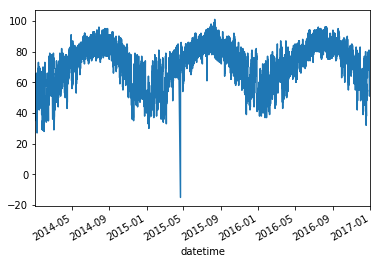

In [41]:
allData[allData.parameter==Temp].value.plot()
# allData[allData.parameter==O3].value.plot()